In [ ]:
import numpy as np                #for the numerical operations
import pandas as pd               #for read file and to handle dataframes
import matplotlib.pyplot as plt   #for visuvalisation of the dataset 
import seaborn as sns             #for visuvalisation in the combination of stats method

In [ ]:
data=pd.read_csv("philips amazon.csv")

In [ ]:
data.head()

,Unnamed: 0,Customer Name,Date,Ratings,Review Title,Reviews
0,0,Handa,7 September 2018,1.0 out of 5 stars,Damaged product,Received damaged productAll scratched
1,1,Aishwarya V,26 August 2018,5.0 out of 5 stars,My mother loves it!,Gifted this to my mother. She was reluctant to...
2,2,Anubha Jha,11 January 2019,1.0 out of 5 stars,Broken - Be aware,My product was broken when it arrived. Unfortu...
3,3,Kshitij Gupta,9 July 2020,4.0 out of 5 stars,No recipe book!!,It is definitely easy to use n totally mess fr...
4,4,Amazon Customer,27 October 2018,1.0 out of 5 stars,very upset need a refund,Finally unboxed the item and tried to cook fri...


In [ ]:
data.shape

(660, 6)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Customer Name', 'Date', 'Ratings', 'Review Title',
       'Reviews'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0        int64
Customer Name    object
Date             object
Ratings          object
Review Title     object
Reviews          object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     660 non-null    int64 
 1   Customer Name  660 non-null    object
 2   Date           660 non-null    object
 3   Ratings        660 non-null    object
 4   Review Title   660 non-null    object
 5   Reviews        660 non-null    object
dtypes: int64(1), object(5)
memory usage: 31.1+ KB


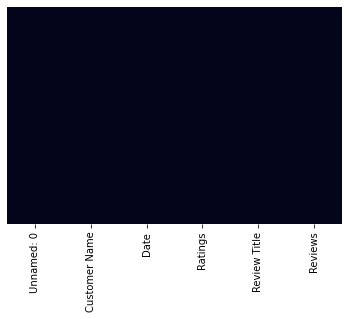

In [ ]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False)

In [ ]:
data=data.drop("Unnamed: 0", axis=1)
data.head()

,Customer Name,Date,Ratings,Review Title,Reviews
0,Handa,7 September 2018,1.0 out of 5 stars,Damaged product,Received damaged productAll scratched
1,Aishwarya V,26 August 2018,5.0 out of 5 stars,My mother loves it!,Gifted this to my mother. She was reluctant to...
2,Anubha Jha,11 January 2019,1.0 out of 5 stars,Broken - Be aware,My product was broken when it arrived. Unfortu...
3,Kshitij Gupta,9 July 2020,4.0 out of 5 stars,No recipe book!!,It is definitely easy to use n totally mess fr...
4,Amazon Customer,27 October 2018,1.0 out of 5 stars,very upset need a refund,Finally unboxed the item and tried to cook fri...


In [ ]:
data.duplicated().sum() 

0

In [ ]:
data=data[["Customer Name","Reviews","Ratings"]]

In [ ]:
data.head()

,Customer Name,Reviews,Ratings
0,Handa,Received damaged productAll scratched,1.0 out of 5 stars
1,Aishwarya V,Gifted this to my mother. She was reluctant to...,5.0 out of 5 stars
2,Anubha Jha,My product was broken when it arrived. Unfortu...,1.0 out of 5 stars
3,Kshitij Gupta,It is definitely easy to use n totally mess fr...,4.0 out of 5 stars
4,Amazon Customer,Finally unboxed the item and tried to cook fri...,1.0 out of 5 stars


In [ ]:
data.Ratings=data.Ratings.map({"1.0 out of 5 stars":1,"2.0 out of 5 stars":2,"3.0 out of 5 stars":3,
                               "4.0 out of 5 stars":4,"5.0 out of 5 stars":5})

In [ ]:
data.head()

,Customer Name,Reviews,Ratings
0,Handa,Received damaged productAll scratched,1
1,Aishwarya V,Gifted this to my mother. She was reluctant to...,5
2,Anubha Jha,My product was broken when it arrived. Unfortu...,1
3,Kshitij Gupta,It is definitely easy to use n totally mess fr...,4
4,Amazon Customer,Finally unboxed the item and tried to cook fri...,1


(array([ 75.,   0.,  25.,   0.,   0.,  39.,   0., 129.,   0., 392.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

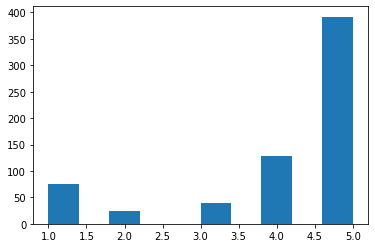

In [ ]:
plt.hist(data.Ratings)

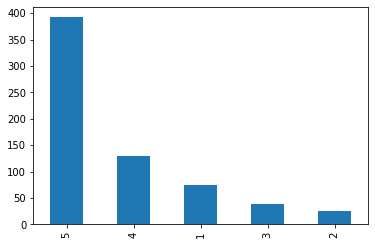

In [ ]:
data["Ratings"].value_counts().plot(kind='bar')

In [ ]:
data_pos=data[data["Ratings"].isin([4,5])]
data_neg=data[data["Ratings"].isin([1,2])]
data_net=data[data["Ratings"].isin([3])]

In [ ]:
data_fil=pd.concat([data_pos,data_neg,data_net])

In [ ]:
data_fil.head()

,Customer Name,Reviews,Ratings
1,Aishwarya V,Gifted this to my mother. She was reluctant to...,5
3,Kshitij Gupta,It is definitely easy to use n totally mess fr...,4
7,COLONEL,Should have been supplied with a Separator as ...,5
8,abilash shrestha,It is nice airfryer come with heavy socket ele...,5
10,AK,Received it 2 days back. On time delivery. Che...,4


In [ ]:
data_fil.tail()

,Customer Name,Reviews,Ratings
577,Yatin O.,Not receivrd bill & warranty card with it & no...,3
620,Amazon Customer,It was a good product,3
625,cyrus shroff,OK,3
654,Sandeep Bidasaria,it is a good product which allows you to enjoy...,3
655,Seshu kumar,Phillips viva air fryer is a useful item consi...,3


In [ ]:
data_fil.shape

(660, 3)

In [ ]:
data_fil["Sentiment"]=1
data_fil["Sentiment"][data_fil["Ratings"].isin([1,2])]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_fil.head()

,Customer Name,Reviews,Ratings,Sentiment
1,Aishwarya V,Gifted this to my mother. She was reluctant to...,5,1
3,Kshitij Gupta,It is definitely easy to use n totally mess fr...,4,1
7,COLONEL,Should have been supplied with a Separator as ...,5,1
8,abilash shrestha,It is nice airfryer come with heavy socket ele...,5,1
10,AK,Received it 2 days back. On time delivery. Che...,4,1


In [ ]:
data=data_fil.drop(["Ratings"],axis="columns")

In [ ]:
data.head()

,Customer Name,Reviews,Sentiment
1,Aishwarya V,Gifted this to my mother. She was reluctant to...,1
3,Kshitij Gupta,It is definitely easy to use n totally mess fr...,1
7,COLONEL,Should have been supplied with a Separator as ...,1
8,abilash shrestha,It is nice airfryer come with heavy socket ele...,1
10,AK,Received it 2 days back. On time delivery. Che...,1


In [ ]:
data.Sentiment.unique()

array([1, 0])

In [ ]:
#we can find the sentiment of the reviews by the another method that is using TEXTBLOB

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
x=data.iloc[:,0:2]
y=data.iloc[:,1:3]

In [ ]:
y=y.drop(["Reviews"],axis="columns")

In [ ]:
y.head()

,Sentiment
1,1
3,1
7,1
8,1
10,1


In [ ]:
x.shape

(660, 2)

In [ ]:
x.head()

,Customer Name,Reviews
1,Aishwarya V,Gifted this to my mother. She was reluctant to...
3,Kshitij Gupta,It is definitely easy to use n totally mess fr...
7,COLONEL,Should have been supplied with a Separator as ...
8,abilash shrestha,It is nice airfryer come with heavy socket ele...
10,AK,Received it 2 days back. On time delivery. Che...


In [ ]:
x.reset_index(inplace=True)
y.reset_index(inplace=True)  

In [ ]:
polarity_score=[]

for i in range(0,x.shape[0]):
  score=TextBlob(x.iloc[i][2])
  score1=score.sentiment[0]
  polarity_score.append(score1)

In [ ]:
x=pd.concat([x,pd.Series(polarity_score)],axis=1)

In [ ]:
x.rename(columns={x.columns[3]:"label"},inplace=True)

In [ ]:
x.head()

,index,Customer Name,Reviews,label
0,1,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444
1,3,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324
2,7,COLONEL,Should have been supplied with a Separator as ...,0.000000
3,8,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333
4,10,AK,Received it 2 days back. On time delivery. Che...,0.030208


In [ ]:
data=pd.concat([x,y],axis="columns")

In [ ]:
data.head()

,index,Customer Name,Reviews,label,index,Sentiment
0,1,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444,1,1
1,3,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324,3,1
2,7,COLONEL,Should have been supplied with a Separator as ...,0.000000,7,1
3,8,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333,8,1
4,10,AK,Received it 2 days back. On time delivery. Che...,0.030208,10,1


In [ ]:
data=data.drop(["index"],axis=1)

In [ ]:
data.head()

,Customer Name,Reviews,label,Sentiment
0,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444,1
1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324,1
2,COLONEL,Should have been supplied with a Separator as ...,0.000000,1
3,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333,1
4,AK,Received it 2 days back. On time delivery. Che...,0.030208,1


In [ ]:
data.tail()

,Customer Name,Reviews,label,Sentiment
655,Yatin O.,Not receivrd bill & warranty card with it & no...,0.00,1
656,Amazon Customer,It was a good product,0.70,1
657,cyrus shroff,OK,0.50,1
658,Sandeep Bidasaria,it is a good product which allows you to enjoy...,0.36,1
659,Seshu kumar,Phillips viva air fryer is a useful item consi...,0.12,1


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444,1
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324,1
2,2,COLONEL,Should have been supplied with a Separator as ...,0.000000,1
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333,1
4,4,AK,Received it 2 days back. On time delivery. Che...,0.030208,1


In [ ]:
len(data[data.label>0])

502

In [ ]:
len(data[data.label<0])

68

In [ ]:
data.Sentiment.value_counts()

1    560
0    100
Name: Sentiment, dtype: int64

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444,1
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324,1
2,2,COLONEL,Should have been supplied with a Separator as ...,0.000000,1
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333,1
4,4,AK,Received it 2 days back. On time delivery. Che...,0.030208,1


In [ ]:
data["Sentiment1"]=data['label'].apply(lambda k: 1 if k>=0 else 0)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444,1,1
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324,1,1
2,2,COLONEL,Should have been supplied with a Separator as ...,0.000000,1,1
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333,1,1
4,4,AK,Received it 2 days back. On time delivery. Che...,0.030208,1,1


In [ ]:
data.tail()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
655,655,Yatin O.,Not receivrd bill & warranty card with it & no...,0.00,1,1
656,656,Amazon Customer,It was a good product,0.70,1,1
657,657,cyrus shroff,OK,0.50,1,1
658,658,Sandeep Bidasaria,it is a good product which allows you to enjoy...,0.36,1,1
659,659,Seshu kumar,Phillips viva air fryer is a useful item consi...,0.12,1,1


In [ ]:
data.Sentiment.value_counts()

1    560
0    100
Name: Sentiment, dtype: int64

In [ ]:
data.Sentiment1.value_counts()

1    592
0     68
Name: Sentiment1, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(data.Sentiment,data.Sentiment1)

In [ ]:
cm

array([[ 41,  59],
       [ 27, 533]])

In [ ]:
data1=data[data["Sentiment"]!=data["Sentiment1"]]

In [ ]:
data1

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
17,17,Smita,Roast food evenly. Frozen snacks come out so w...,-0.070833,1,0
23,23,Mahesh,1. Inner space is very less as compare to oven...,-0.295833,1,0
33,33,Dibyajyoti Oja,It is easy to operate with virtually no techno...,-0.083333,1,0
45,45,sangeeta chandrashekar,"Product was good overall. Good taste, almost n...",-0.010000,1,0
47,47,Subhasis Dutra,"Product is good but made in China, this is my ...",-0.100000,1,0
...,...,...,...,...,...,...
629,629,Ashish Jha,I used this product for preparing chicken and ...,-0.387500,1,0
640,640,Deepak K.,The recepie book is missing in the box. Pls share,-0.200000,1,0
642,642,Revathyanoop,Code length its very less,-0.216667,1,0
646,646,Amazon Customer,What i had expected it is not that upto,-0.100000,1,0


In [ ]:
print("Wrongly classified are:",len(data1))

Wrongly classified are: 86


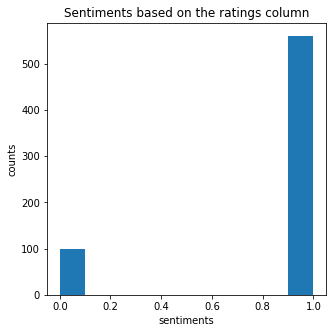

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

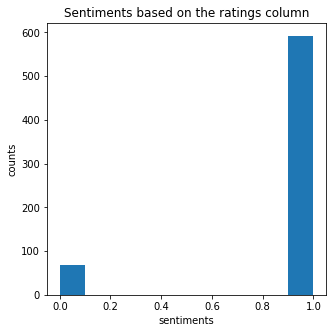

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment1)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

In [ ]:
#to find out the wrongly classified 

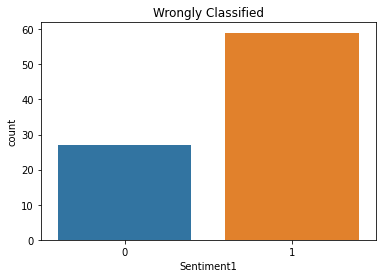

In [ ]:
sns.countplot(data=data1, x= 'Sentiment1')
plt.title("Wrongly Classified");

In [ ]:
#building the wordcloud for the positive,negative and neutral

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444,1,1
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324,1,1
2,2,COLONEL,Should have been supplied with a Separator as ...,0.000000,1,1
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333,1,1
4,4,AK,Received it 2 days back. On time delivery. Che...,0.030208,1,1


In [ ]:
#word cloud on the reviews columns in the dataset

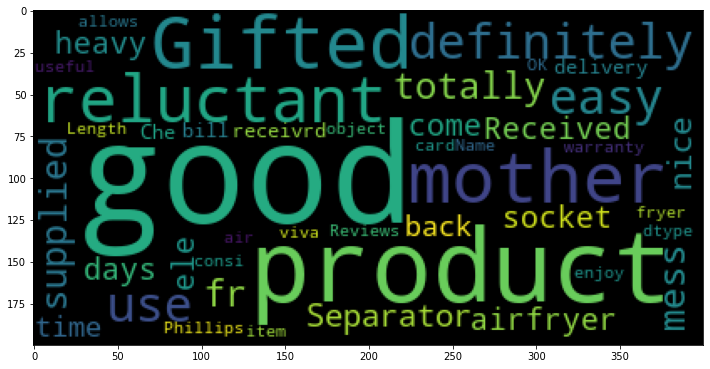

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words("english")).generate(str(data.Reviews))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
data_pos=data[data.Sentiment==1]
data_pos.shape

(560, 6)

In [ ]:
data_neg=data[data.Sentiment==0]
data_neg.shape

(100, 6)

In [ ]:
#wordcloud on the postive reviews in the dataset

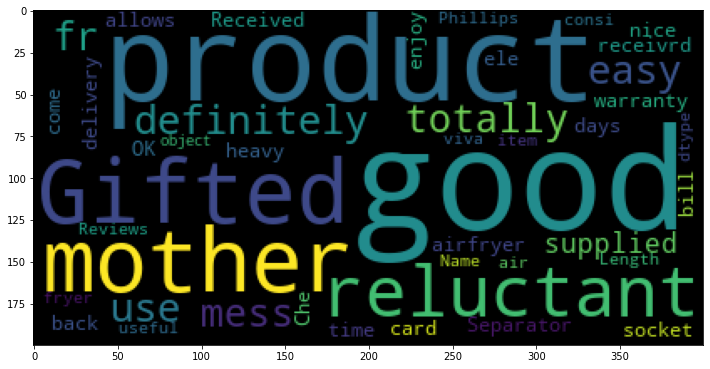

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_pos["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
#wordcloud on the neutral reviews in the dataset

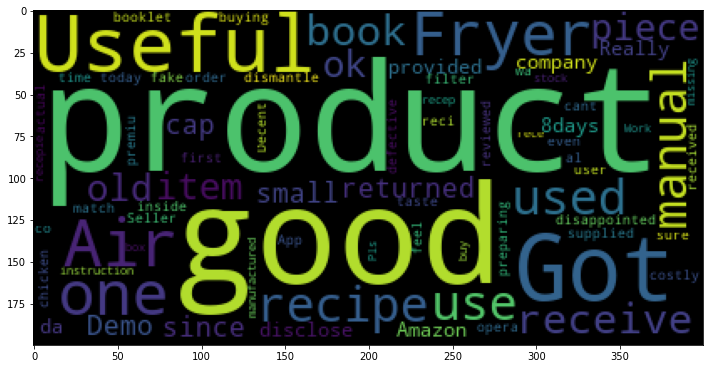

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_net["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
#wordcloud on the negative reviews in the dataset

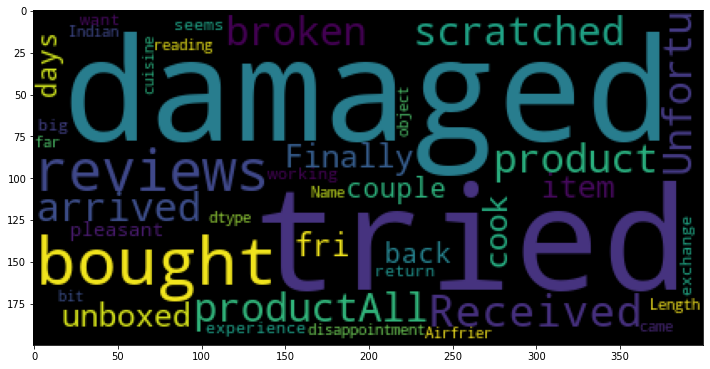

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_neg["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,0.344444,1,1
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,0.156324,1,1
2,2,COLONEL,Should have been supplied with a Separator as ...,0.000000,1,1
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,0.283333,1,1
4,4,AK,Received it 2 days back. On time delivery. Che...,0.030208,1,1


In [ ]:
#seperate the depended and independed variable
remove=["label","Sentiment","Sentiment1"]
x=data.drop(labels=remove,axis=1)

In [ ]:
remove=["Reviews","label","Sentiment1"]
y=data.drop(labels=remove,axis=1)

In [ ]:
y

,index,Customer Name,Sentiment
0,0,Aishwarya V,1
1,1,Kshitij Gupta,1
2,2,COLONEL,1
3,3,abilash shrestha,1
4,4,AK,1
...,...,...,...
655,655,Yatin O.,1
656,656,Amazon Customer,1
657,657,cyrus shroff,1
658,658,Sandeep Bidasaria,1


In [ ]:
import re                               #regular expression
import nltk                              #Natural Language Toolkit 
from nltk.corpus import stopwords         #the common words in the language
from nltk.stem import WordNetLemmatizer    #converts the similar words into the single word with sence

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lem=WordNetLemmatizer()

In [ ]:
corpus=[]

In [ ]:
#clean data in this
    #we remove stopwords
    #we convert all into lower case
    #we split the sentences into words 
    #by using words it lematise the words
    #after we combine into sentence
    #finally we should append it to corpus

In [ ]:
for i in range(0,len(x)):
  review=re.sub('[^a-zA-Z0-9]',' ',x.Reviews[i])
  review=review.lower()
  review=review.split()
  review=[lem.lemmatize(word)for word in review if word not in set (stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
x.Reviews[1]

"It is definitely easy to use n totally mess free but it Is definitely not easy to clean. My biggest complaint is that there is no recipe book with the airfryer. Didn't expect this from a company like Phillips who is a pioneer in this field .After buying a product worth 10 k ,they expect us to search for recipes online!!!"

In [ ]:
corpus[1]

'definitely easy use n totally mess free definitely easy clean biggest complaint recipe book airfryer expect company like phillips pioneer field buying product worth 10 k expect u search recipe online'

In [ ]:
df=pd.DataFrame(corpus)

In [ ]:
data=pd.concat([x,df],axis=1)

In [ ]:
data.head()

,index,Customer Name,Reviews,0
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...
2,2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...
4,4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...


In [ ]:
data.rename(columns={0:"cleaned Reviews"},inplace=True)

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...
2,2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...
4,4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...


In [ ]:
!pip install texthero

In [ ]:
import texthero as hero

In [ ]:
data['tfidf']=(
    data['cleaned Reviews']
    .pipe(hero.clean)
    .pipe(hero.tfidf)        #->remove 'do_'
)

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...,"[0.0, 0.18188674585283535, 0.0, 0.0, 0.0, 0.19..."


In [ ]:
#appling the clustering to the tfidf

In [ ]:
data['kmeans']=(
    data['tfidf']
    .pipe(hero.kmeans,n_clusters=2)     #->remove 'do_'
    .astype(str)
)

In [ ]:
data.kmeans.unique()

array(['0', '1'], dtype=object)

In [ ]:
#we have to reduce the feature by applying PCA on tfidf feature

In [ ]:
data['pca']=data['tfidf'].pipe(hero.pca)     #->remove 'do_'

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.1380610018378373, -0.0044155560802028515]"
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.13804884004010345, -0.1254872927231077]"
2,2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12829764465458743, -0.03803611630758022]"
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.15801848848790834, -0.12365474531189974]"
4,4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...,"[0.0, 0.18188674585283535, 0.0, 0.0, 0.0, 0.19...",0,"[-0.07865858228544867, 0.013860999523862839]"


In [ ]:
hero.scatterplot(data,'pca',color='kmeans',title="reviews grouping")
plt.figure(figsize=(12,12))
plt.show()

<Figure size 864x864 with 0 Axes>

In [ ]:
#Plot of most used words
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(data['cleaned Reviews'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_

In [ ]:
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_ngram

,frequency,bigram
0,66,good product
1,41,air fryer
2,39,easy use
3,26,excellent product
4,23,recipe book
...,...,...
4752,1,10 expect
4753,1,10 day
4754,1,10 15
4755,1,10 000


In [ ]:
df_plot=df_ngram.head(10)
df_plot

,frequency,bigram
0,66,good product
1,41,air fryer
2,39,easy use
3,26,excellent product
4,23,recipe book
5,23,great product
6,18,french fry
7,15,oil free
8,14,product good
9,14,easy clean


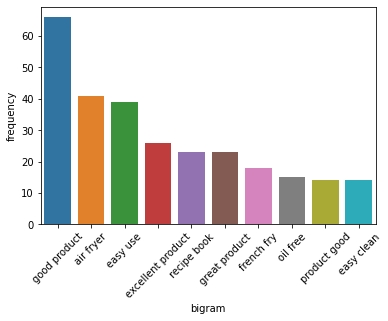

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="bigram", y="frequency", data=df_plot)
plt.xticks(rotation=45)
plt.show()

# Emotion Mining

In [ ]:
import text2emotion as te

In [ ]:
!pip install text2emotion

In [ ]:
data["Emotion"]=data["cleaned Reviews"].apply(lambda text: te.get_emotion(text))
data["Emotion"]

0      {'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.36...
1      {'Happy': 0.33, 'Angry': 0.11, 'Surprise': 0.0...
2      {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.43,...
3      {'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...
4      {'Happy': 0.33, 'Angry': 0.08, 'Surprise': 0.3...
                             ...                        
655    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
656    {'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...
657    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
658    {'Happy': 0.6, 'Angry': 0.0, 'Surprise': 0.2, ...
659    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.12,...
Name: Emotion, Length: 660, dtype: object

In [ ]:
data['Happy']  = data["Emotion"].apply(lambda score_dict: score_dict['Happy'])
data["Happy"]

0      0.18
1      0.33
2      0.00
3      0.33
4      0.33
       ... 
655    0.00
656    1.00
657    0.00
658    0.60
659    0.00
Name: Happy, Length: 660, dtype: float64

In [ ]:
data['Angry']  = data["Emotion"].apply(lambda score_dict: score_dict['Angry'])
data["Angry"]

0      0.00
1      0.11
2      0.00
3      0.00
4      0.08
       ... 
655    0.00
656    0.00
657    0.00
658    0.00
659    0.00
Name: Angry, Length: 660, dtype: float64

In [ ]:
data['Surprise']  = data["Emotion"].apply(lambda score_dict: score_dict['Surprise'])
data["Surprise"]

0      0.36
1      0.00
2      0.43
3      0.33
4      0.33
       ... 
655    0.00
656    0.00
657    0.00
658    0.20
659    0.12
Name: Surprise, Length: 660, dtype: float64

In [ ]:
data['Sad']  = data["Emotion"].apply(lambda score_dict: score_dict['Sad'])
data["Sad"]

0      0.36
1      0.11
2      0.14
3      0.33
4      0.25
       ... 
655    0.00
656    0.00
657    0.00
658    0.20
659    0.62
Name: Sad, Length: 660, dtype: float64

In [ ]:
data['Fear']  = data["Emotion"].apply(lambda score_dict: score_dict['Fear'])
data["Fear"]

0      0.09
1      0.44
2      0.43
3      0.00
4      0.00
       ... 
655    1.00
656    0.00
657    0.00
658    0.00
659    0.25
Name: Fear, Length: 660, dtype: float64

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.1380610018378373, -0.0044155560802028515]","{'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.36...",0.18,0.00,0.36,0.36,0.09
1,1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.13804884004010345, -0.1254872927231077]","{'Happy': 0.33, 'Angry': 0.11, 'Surprise': 0.0...",0.33,0.11,0.00,0.11,0.44
2,2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12829764465458743, -0.03803611630758022]","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.43,...",0.00,0.00,0.43,0.14,0.43
3,3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.15801848848790834, -0.12365474531189974]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...",0.33,0.00,0.33,0.33,0.00
4,4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...,"[0.0, 0.18188674585283535, 0.0, 0.0, 0.0, 0.19...",0,"[-0.07865858228544867, 0.013860999523862839]","{'Happy': 0.33, 'Angry': 0.08, 'Surprise': 0.3...",0.33,0.08,0.33,0.25,0.00


In [ ]:
data=data.drop("index",axis=1)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.1380610018378373, -0.0044155560802028515]","{'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.36...",0.18,0.00,0.36,0.36,0.09
1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.13804884004010345, -0.1254872927231077]","{'Happy': 0.33, 'Angry': 0.11, 'Surprise': 0.0...",0.33,0.11,0.00,0.11,0.44
2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12829764465458743, -0.03803611630758022]","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.43,...",0.00,0.00,0.43,0.14,0.43
3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.15801848848790834, -0.12365474531189974]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...",0.33,0.00,0.33,0.33,0.00
4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...,"[0.0, 0.18188674585283535, 0.0, 0.0, 0.0, 0.19...",0,"[-0.07865858228544867, 0.013860999523862839]","{'Happy': 0.33, 'Angry': 0.08, 'Surprise': 0.3...",0.33,0.08,0.33,0.25,0.00


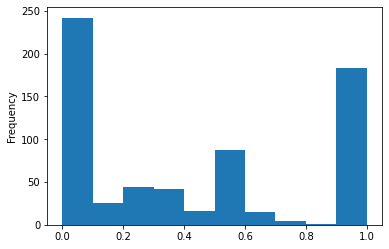

In [ ]:
#Histogram of Happy emotion from the reviews
data["Happy"].plot(kind="hist")

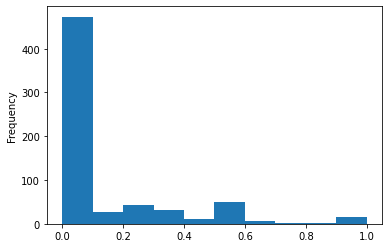

In [ ]:
#Histogram of Sad emotion from the reviews
data["Sad"].plot(kind="hist")

Happy  Angry  Surprise  Sad   Fear
0.18   0.0    0.36      0.36  0.09    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

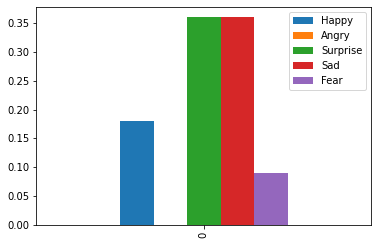

In [ ]:
#Histogram of the first review
data.head(1).groupby(["Happy","Angry","Surprise","Sad","Fear"]).plot(kind="bar")

# Parts Of Speech Tagging

In [ ]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
# creating the nlp obejct
nlp = spacy.load("en_core_web_sm")

# defining the stop_words and punctuations we want to remove
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
# Loop to get just the adjectives from each review
words_adj = []
for line in data['Reviews']:  
    doc= nlp(line) 
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ'] 
    words_adj.append(tokens)

In [ ]:
# create a new column with the adjectives
data['words_adj'] = pd.Series(words_adj)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.1380610018378373, -0.0044155560802028515]","{'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.36...",0.18,0.00,0.36,0.36,0.09,"[reluctant, usual, easy, yummy, minimal, great..."
1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.13804884004010345, -0.1254872927231077]","{'Happy': 0.33, 'Angry': 0.11, 'Surprise': 0.0...",0.33,0.11,0.00,0.11,0.44,"[easy, free, easy, big, recipe, worth]"
2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12829764465458743, -0.03803611630758022]","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.43,...",0.00,0.00,0.43,0.14,0.43,"[additional, high, additional]"
3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.15801848848790834, -0.12365474531189974]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...",0.33,0.00,0.33,0.33,0.00,"[nice, heavy, electric, safe, big, indian, tas..."
4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...,"[0.0, 0.18188674585283535, 0.0, 0.0, 0.0, 0.19...",0,"[-0.07865858228544867, 0.013860999523862839]","{'Happy': 0.33, 'Angry': 0.08, 'Surprise': 0.3...",0.33,0.08,0.33,0.25,0.00,"[frozen, excellent, only, dry, hard, bad, ur, ..."


In [ ]:
#MOST COMMON POSITIVE ADJECTIVES
from collections import Counter
positive_adj= data[data['kmeans']=='0']['words_adj']
pos_words= [line for line in positive_adj for line in set(line)]
pos_adj_count= Counter(pos_words).most_common(10)
pos_adj_count

[('good', 146),
 ('easy', 63),
 ('excellent', 45),
 ('great', 42),
 ('useful', 34),
 ('healthy', 31),
 ('free', 24),
 ('nice', 24),
 ('happy', 24),
 ('less', 22)]

In [ ]:
dfp=pd.DataFrame(pos_adj_count)
dfp

,0,1
0,good,146
1,easy,63
2,excellent,45
3,great,42
4,useful,34
5,healthy,31
6,free,24
7,nice,24
8,happy,24
9,less,22


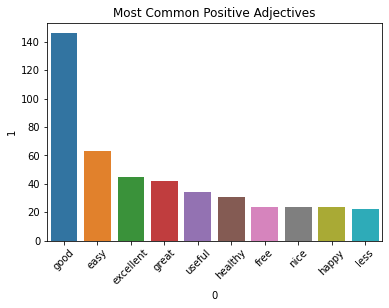

In [ ]:
#Plot to show the positive adjectives
sns.barplot(x=0, y=1, data=dfp)
plt.xticks(rotation=45)
plt.title("Most Common Positive Adjectives");
plt.show()

In [ ]:
#MOST COMMON NEGATIVE ADJECTIVES
import collections
negative_adj= data[data['kmeans']=='1']['words_adj']
neg_words= [line for line in negative_adj for line in set(line)]
neg_adj_count= collections.Counter(neg_words).most_common(10)
neg_adj_count


[('good', 64), ('easy', 2), ('useful', 1)]

In [ ]:
dfn=pd.DataFrame(neg_adj_count)
dfn

,0,1
0,good,64
1,easy,2
2,useful,1


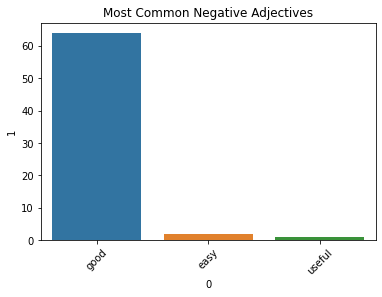

In [ ]:
#Plot to show negative adjectives
sns.barplot(x=0, y=1, data=dfn)
plt.xticks(rotation=45)
plt.title("Most Common Negative Adjectives");
plt.show()

# Named Entity Recognition

In [ ]:
rev=data['Reviews']
rev[0]

"Gifted this to my mother. She was reluctant to use it first as she is used to the usual frying process. But as she got used to it, she loved it! She still thanks me for this (even after 2 years) because this has made her life so much easier. Some yummy snacks can be made in this air fryer with minimal effort. It's especially great if guests are coming over and you quickly want to prepare snacks. Amazing product! And Philips is better than other brands in this category."

In [ ]:
import spacy
from spacy import displacy


nlp = spacy.load("en_core_web_sm")
doc = nlp(rev[0])
displacy.render(doc, style="dep")

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="42a5ae0d7ee54b7cbb73971a44a1a9d4-0" class="displacy" width="15975" height="837.0" direction="ltr" style="max-width: none; height: 837.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="747.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Gifted</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">VERB</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="747.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">this</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="747.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">to</tspan>\n    <tspan class="displacy-t

In [ ]:
displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">Gifted this to my mother. She was reluctant to use it \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    first\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">ORDINAL</span>\n</mark>\n as she is used to the usual frying process. But as she got used to it, she loved it! She still thanks me for this (even after \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    2 years\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n) because this has made her life so much easier. Some yummy snacks can be made in this

#LDA

In [ ]:
import gensim
from gensim import corpora,models
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Aishwarya V,Gifted this to my mother. She was reluctant to...,gifted mother reluctant use first used usual f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.1380610018378373, -0.0044155560802028515]","{'Happy': 0.18, 'Angry': 0.0, 'Surprise': 0.36...",0.18,0.00,0.36,0.36,0.09,"[reluctant, usual, easy, yummy, minimal, great..."
1,Kshitij Gupta,It is definitely easy to use n totally mess fr...,definitely easy use n totally mess free defini...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.13804884004010345, -0.1254872927231077]","{'Happy': 0.33, 'Angry': 0.11, 'Surprise': 0.0...",0.33,0.11,0.00,0.11,0.44,"[easy, free, easy, big, recipe, worth]"
2,COLONEL,Should have been supplied with a Separator as ...,supplied separator shown video also additional...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12829764465458743, -0.03803611630758022]","{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.43,...",0.00,0.00,0.43,0.14,0.43,"[additional, high, additional]"
3,abilash shrestha,It is nice airfryer come with heavy socket ele...,nice airfryer come heavy socket electric cord ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.15801848848790834, -0.12365474531189974]","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...",0.33,0.00,0.33,0.33,0.00,"[nice, heavy, electric, safe, big, indian, tas..."
4,AK,Received it 2 days back. On time delivery. Che...,received 2 day back time delivery cheer amazon...,"[0.0, 0.18188674585283535, 0.0, 0.0, 0.0, 0.19...",0,"[-0.07865858228544867, 0.013860999523862839]","{'Happy': 0.33, 'Angry': 0.08, 'Surprise': 0.3...",0.33,0.08,0.33,0.25,0.00,"[frozen, excellent, only, dry, hard, bad, ur, ..."


In [ ]:
data.columns

Index(['Customer Name', 'Reviews', 'cleaned Reviews', 'tfidf', 'kmeans', 'pca',
       'Emotion', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear', 'words_adj'],
      dtype='object')

In [ ]:
#from the above we need only Reviews column to find the topics of the in the each review column

In [ ]:
remove=["Customer Name","cleaned Reviews","tfidf","kmeans","pca","Emotion","Happy","Angry","Surprise","Sad","Fear","words_adj"]
data1=data.drop(labels=remove,axis="columns")

In [ ]:
data1.head()

,Reviews
0,Gifted this to my mother. She was reluctant to...
1,It is definitely easy to use n totally mess fr...
2,Should have been supplied with a Separator as ...
3,It is nice airfryer come with heavy socket ele...
4,Received it 2 days back. On time delivery. Che...


In [ ]:
#this is the raw data we have to clean the data
#to find the topics in the each topic modelling in reviews 

In [ ]:
#clean the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [ ]:
data1["review_clean"]=data1["Reviews"].apply(clean)

In [ ]:
data1.head()

,Reviews,review_clean
0,Gifted this to my mother. She was reluctant to...,"[gifted, mother, reluctant, use, first, used, ..."
1,It is definitely easy to use n totally mess fr...,"[definitely, easy, use, n, totally, mess, free..."
2,Should have been supplied with a Separator as ...,"[supplied, separator, shown, videoand, also, a..."
3,It is nice airfryer come with heavy socket ele...,"[nice, airfryer, come, heavy, socket, electric..."
4,Received it 2 days back. On time delivery. Che...,"[received, 2, day, back, time, delivery, cheer..."


In [ ]:
data1["review_clean"][3]

['nice',
 'airfryer',
 'come',
 'heavy',
 'socket',
 'electric',
 'cord',
 'arrived',
 'safe',
 'package',
 'big',
 'box',
 'without',
 'damaged',
 'come',
 'indian',
 'receipe',
 'book',
 'tried',
 'fish',
 'tasty',
 'follow',
 'book',
 'use',
 'easy',
 'clean']

In [ ]:
#create dictionary
dictionary=corpora.Dictionary(data1["review_clean"])

In [ ]:
dictionary[1699]

'pot'

In [ ]:
len(dictionary)

1803

In [ ]:
#total no of non-zeros in the dictionary

In [ ]:
print(dictionary.num_nnz)

6183


In [ ]:
#create term document matrix

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data1['review_clean'] ]
print(len(doc_term_matrix))

660


In [ ]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(28, 1),
  (34, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 2),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(34, 1),
  (42, 1),
  (44, 2),
  (46, 1),
  (50, 1),
  (84,

In [ ]:
#instantiate LDA model 

In [ ]:
lda=gensim.models.ldamodel.LdaModel

In [ ]:
#fit LDA model on dataset

In [ ]:
num_topics=5
ldamodel=lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

In [ ]:
#print the topics identified by LDA model

In [ ]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.063*"good" + 0.055*"product" + 0.012*"air" + 0.011*"fryer" + 0.011*"it" + 0.009*"oil" + 0.009*"time" + 0.008*"received" + 0.008*"defective" + 0.007*"one"'),
 (1,
  '0.035*"easy" + 0.032*"use" + 0.030*"product" + 0.014*"good" + 0.013*"recipe" + 0.011*"book" + 0.010*"clean" + 0.010*"cook" + 0.010*"oil" + 0.009*"fry"'),
 (2,
  '0.057*"product" + 0.020*"good" + 0.019*"excellent" + 0.015*"great" + 0.013*"one" + 0.012*"buy" + 0.011*"food" + 0.011*"best" + 0.010*"healthy" + 0.010*"amazon"'),
 (3,
  '0.038*"product" + 0.018*"oil" + 0.015*"good" + 0.014*"food" + 0.011*"love" + 0.010*"fried" + 0.010*"amazon" + 0.010*"philip" + 0.009*"it" + 0.009*"taste"'),
 (4,
  '0.017*"oil" + 0.013*"fry" + 0.011*"food" + 0.010*"like" + 0.009*"free" + 0.009*"use" + 0.008*"work" + 0.008*"cooking" + 0.008*"even" + 0.008*"easy"')]

In [ ]:
lda_corpus = ldamodel[doc_term_matrix]

In [ ]:
[doc for doc in lda_corpus]

[[(0, 0.0045264405),
  (1, 0.14556493),
  (2, 0.0045366795),
  (3, 0.84084505),
  (4, 0.00452691)],
 [(0, 0.0059546875),
  (1, 0.006102849),
  (2, 0.00599862),
  (3, 0.006009049),
  (4, 0.97593474)],
 [(0, 0.9576101),
  (1, 0.010596293),
  (2, 0.010630687),
  (3, 0.010590369),
  (4, 0.010572543)],
 [(0, 0.0074574053),
  (1, 0.0076728035),
  (2, 0.007607344),
  (3, 0.0075532324),
  (4, 0.96970916)],
 [(0, 0.004705106),
  (1, 0.0047213743),
  (2, 0.0047132457),
  (3, 0.98113793),
  (4, 0.0047223773)],
 [(0, 0.0044948943),
  (1, 0.0045398767),
  (2, 0.981998),
  (3, 0.004483916),
  (4, 0.0044833)],
 [(0, 0.7197654),
  (1, 0.23356102),
  (2, 0.015491783),
  (3, 0.01552118),
  (4, 0.015660588)],
 [(0, 0.005878684),
  (1, 0.9766247),
  (2, 0.0058299107),
  (3, 0.0058805333),
  (4, 0.0057860916)],
 [(0, 0.0073330165),
  (1, 0.9707585),
  (2, 0.007303821),
  (3, 0.007320881),
  (4, 0.007283752)],
 [(0, 0.9655507),
  (1, 0.008817888),
  (2, 0.008593009),
  (3, 0.008455172),
  (4, 0.0085832095)]